# Experimenting with CNNs & ResNET on MNIST

### Here I explore various CNN architectures including a ResNET and compare their performances.

In [0]:
%config IPCompleter.greedy=True

## Step 1: Defining Preliminaries

In [3]:
import warnings
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras import backend as K
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time
warnings.filterwarnings("ignore")
%matplotlib notebook

#A function to plot losses at training phase againsst the number of epochs.
def loss_plotter(ty, vy, n_epoch):
    x = list(range(1, n_epoch+1))
    test_l = np.array(ty)
    val_l = np.array(vy)
    
    td = {'epoch': x, 't_loss': test_l}
    vd = {'epoch': x, 'v_loss': val_l}
    
    tdf = pd.DataFrame(td)
    vdf = pd.DataFrame(vd)
    
    ax = sns.set(style='darkgrid')
    ax = sns.lineplot(x='epoch', y='t_loss', data=tdf, label='Training Loss')
    ax = sns.lineplot(x='epoch', y='v_loss', data=vdf, label='Validation loss')
    ax.set(xlabel='Number of epochs', ylabel='Loss')
    plt.legend()
    plt.show()

Using TensorFlow backend.


## Step 2: Data Loading & Pre-Processing

In [0]:
#Setting up required variables...

batch_size = 128
n_class = 10
n_epoch = 12
img_rows, img_cols = 28, 28

In [5]:
#Getting the datasets...

(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
#Setting the number of channels to 1 for mnist data which is black-white data...

if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)       

In [7]:
#Data normalization...

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print('Data shape:', X_train.shape)
print('Number of training samples:', X_train.shape[0])
print('Number of test samples:', X_test.shape[0])

Data shape: (60000, 28, 28, 1)
Number of training samples: 60000
Number of test samples: 10000


In [0]:
#Setting class labels to one-hot vector encodings

Y_train = np_utils.to_categorical(y_train, n_class)
Y_test = np_utils.to_categorical(y_test, n_class)

## Step 3: Defining Model Architecture

### Model 1: CNN with 2 convolution layers of 32 and 64 5X5 filters respectively, and one max_pool before flatten and 2 dense layers of 256 and 128 units each with dropouts for classification.

In [9]:
cnn_model1 = Sequential()

#Convoultional layers...
cnn_model1.add(Conv2D(32, (5, 5), activation='relu', input_shape=input_shape))
cnn_model1.add(Conv2D(64, (5, 5), activation='relu'))
cnn_model1.add(MaxPooling2D(pool_size=(3, 3)))
cnn_model1.add(Dropout(0.25))

#Flatten and classify...
cnn_model1.add(Flatten())
cnn_model1.add(Dense(256, activation='relu'))
cnn_model1.add(Dropout(0.25))
cnn_model1.add(Dense(128, activation='relu'))
cnn_model1.add(Dropout(0.5))
cnn_model1.add(Dense(n_class, activation='softmax'))

#Compile the model
cnn_model1.compile(optimizer='Adadelta', loss='categorical_crossentropy', metrics=['accuracy'])

W0804 17:33:21.656090 139968403437440 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0804 17:33:21.692426 139968403437440 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0804 17:33:21.699009 139968403437440 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0804 17:33:21.735858 139968403437440 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0804 17:33:21.738900 139968403437440 deprecation_wrapp

## Step 4: Train the model

In [10]:
history = cnn_model1.fit(X_train, Y_train, batch_size=batch_size, epochs=n_epoch, verbose=1, validation_data=(X_test, Y_test))

W0804 17:33:21.978628 139968403437440 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 12s 199us/step - loss: 0.2695 - acc: 0.9157 - val_loss: 0.0571 - val_acc: 0.9823
Epoch 2/12
60000/60000 [==============================] - 5s 76us/step - loss: 0.0782 - acc: 0.9777 - val_loss: 0.0321 - val_acc: 0.9897
Epoch 3/12
60000/60000 [==============================] - 5s 77us/step - loss: 0.0578 - acc: 0.9840 - val_loss: 0.0317 - val_acc: 0.9898
Epoch 4/12
60000/60000 [==============================] - 5s 77us/step - loss: 0.0460 - acc: 0.9870 - val_loss: 0.0265 - val_acc: 0.9907
Epoch 5/12
60000/60000 [==============================] - 5s 77us/step - loss: 0.0388 - acc: 0.9894 - val_loss: 0.0251 - val_acc: 0.9925
Epoch 6/12
60000/60000 [==============================] - 5s 77us/step - loss: 0.0351 - acc: 0.9904 - val_loss: 0.0223 - val_acc: 0.9932
Epoch 7/12
60000/60000 [==============================] - 5s 77us/step - loss: 0.0318 - acc: 0.9909 - val_loss: 0.0232 - val_a

## Step 5: Evaluate the Model

Test loss: 0.025065377400253327
Test accuracy: 0.9927


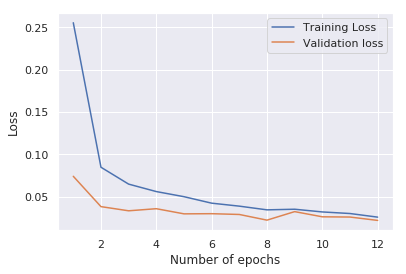

In [16]:
score1 = cnn_model1.evaluate(X_test, Y_test, verbose=0)
print("Test loss:", score1[0])
print("Test accuracy:", score1[1])

ty = history.history['loss']
vy = history.history['val_loss']

%matplotlib inline
loss_plotter(ty, vy, n_epoch)

**_Inference:_** Model 1 gives good test accuracy and does not overfit much in 12 epochs.

### Model 2: CNN with 5 convolution layers with batch normalization

In [0]:
cnn_model2 = Sequential()

#Convoultional layers...
cnn_model2.add(Conv2D(128, (5, 5), activation='relu', input_shape=input_shape))
cnn_model2.add(Conv2D(64, (5, 5), activation='relu'))
cnn_model2.add(BatchNormalization())

cnn_model2.add(Conv2D(64, (3, 3), activation='relu'))
cnn_model2.add(Conv2D(32, (3, 3), activation='relu'))
cnn_model2.add(BatchNormalization())

cnn_model2.add(Conv2D(16, (3, 3), activation='relu'))
cnn_model2.add(MaxPooling2D(pool_size=(2, 2)))

#Flatten and classify...
cnn_model2.add(Flatten())
cnn_model2.add(Dense(128, activation='relu'))
cnn_model2.add(Dropout(0.5))
cnn_model2.add(Dense(n_class, activation='softmax'))

#Compile the model
cnn_model2.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

### Training Model 2

In [13]:
history = cnn_model2.fit(X_train, Y_train, batch_size=batch_size, epochs=n_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 12s 194us/step - loss: 0.2556 - acc: 0.9226 - val_loss: 0.0741 - val_acc: 0.9775
Epoch 2/12
60000/60000 [==============================] - 10s 171us/step - loss: 0.0848 - acc: 0.9757 - val_loss: 0.0382 - val_acc: 0.9881
Epoch 3/12
60000/60000 [==============================] - 10s 171us/step - loss: 0.0648 - acc: 0.9817 - val_loss: 0.0333 - val_acc: 0.9890
Epoch 4/12
60000/60000 [==============================] - 10s 170us/step - loss: 0.0560 - acc: 0.9839 - val_loss: 0.0358 - val_acc: 0.9897
Epoch 5/12
60000/60000 [==============================] - 10s 170us/step - loss: 0.0500 - acc: 0.9848 - val_loss: 0.0297 - val_acc: 0.9906
Epoch 6/12
60000/60000 [==============================] - 10s 170us/step - loss: 0.0423 - acc: 0.9875 - val_loss: 0.0298 - val_acc: 0.9909
Epoch 7/12
60000/60000 [==============================] - 10s 170us/step - loss: 0.0388 - acc: 0.9887 - val_loss: 0.

### Evaluating Model 2

Test loss: 0.021898293099513376
Test accuracy: 0.9934


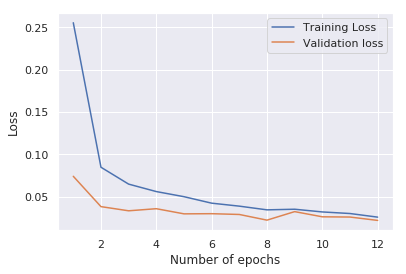

In [17]:
score2 = cnn_model2.evaluate(X_test, Y_test, verbose=0)
print("Test loss:", score2[0])
print("Test accuracy:", score2[1])

ty = history.history['loss']
vy = history.history['val_loss']

%matplotlib inline
loss_plotter(ty, vy, n_epoch)

***Inference:*** Model 2 gives slightly better test accuracy than Model 1 and does not exhibit overfitting to train data.

### Model 3: Residual CNN with 10 layers

Model 3 is a residual network architecture with one identity block and two convolutional blocks. The detailed architecture is illustrated in the figure below:
![architecture](https://drive.google.com/uc?id=1-wyB-egoHYR10CRxigtw60trBe8yqb8A)



In [0]:
from keras.layers import Input, Add, Activation
from keras.initializers import glorot_uniform
from keras.models import Model, load_model

#First Identity block with 5X5 kernels
def identity_block_5x5(X, n_filters):
    
    #Forking to a skip connection...
    X_skip = X
    
    #Implementing the layers using callable layer objects...
    X = Conv2D(filters=n_filters, kernel_size=(5, 5), strides = (1, 1), padding='same', kernel_initializer=glorot_uniform(seed=0))(X)
    X = Activation('relu')(X)
    
    X = Conv2D(filters=n_filters, kernel_size=(5, 5), strides = (1, 1), padding='same', kernel_initializer=glorot_uniform(seed=0))(X)
    X = Activation('relu')(X)
    
    X = MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding='same')(X)
    
    X = BatchNormalization()(X)
    
    #Implementing the skip connection join by addition layer...
    X = Add()([X, X_skip])
    X = Activation('relu')(X)
    
    return X

#Convolution block where the skip connection itself goes through a convolution layer
def conv_block_3x3(X, n_filters):
    
    #Forking to a skip connection...
    X_skip = X
    
    X = Conv2D(filters=n_filters, kernel_size=(3, 3), strides = (1, 1), padding='same', kernel_initializer=glorot_uniform(seed=0))(X)
    X = Activation('relu')(X)
    
    X = Conv2D(filters=n_filters, kernel_size=(3, 3), strides = (1, 1), padding='same', kernel_initializer=glorot_uniform(seed=0))(X)
    X = Activation('relu')(X)
    
    X = MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding='same')(X)
    
    X = BatchNormalization()(X)
    
    #Convoluting on the skip connection...
    X_skip = Conv2D(filters=n_filters, kernel_size = (3, 3), strides = (1, 1), padding='same')(X_skip)
    X_skip = Activation('relu')(X_skip)
    
    #Implementing the skip connection join by addition layer...
    X = Add()([X, X_skip])
    X = Activation('relu')(X)
    
    return X

#Function to define the entire residual network architecture...
def resCNN(input_shape=(28, 28, 1), n_class=10):
    
    #Setting input shape...
    X_input = Input(input_shape)
    
    #First convolution layer followed by max-pooling...
    X = Conv2D(64, (7, 7), strides=(1, 1), kernel_initializer=glorot_uniform(seed=0))(X_input)
    X = MaxPooling2D((3, 3), strides=(1, 1))(X)
    
    #Adding the residual blocks to the model...
    X = identity_block_5x5(X, 64)
    
    X = conv_block_3x3(X, 32)
    
    X = conv_block_3x3(X, 16)
    
    #Last convolution layer after exiting from residual blocks...
    X = Conv2D(16, (3, 3), strides=(1, 1))(X)
    X = MaxPooling2D(pool_size=(2, 2), strides=(1, 1))(X)
    X = BatchNormalization()(X)
    
    #Flatten and classify...
    X = Flatten()(X)
    X = Dense(n_class, activation='softmax')(X)
    
    #Define a keras model with described architecture...
    model = Model(inputs = X_input, outputs = X, name='resCNN')
    
    return model

#create model...
cnn_model3 = resCNN(input_shape=input_shape, n_class=10)

#compile model...
cnn_model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [27]:
#Train the model...
history = cnn_model3.fit(X_train, Y_train, batch_size=batch_size, epochs=n_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 17s 289us/step - loss: 0.1328 - acc: 0.9603 - val_loss: 0.1405 - val_acc: 0.9638
Epoch 2/12
60000/60000 [==============================] - 15s 252us/step - loss: 0.0644 - acc: 0.9822 - val_loss: 0.1797 - val_acc: 0.9558
Epoch 3/12
60000/60000 [==============================] - 15s 254us/step - loss: 0.0503 - acc: 0.9855 - val_loss: 0.1044 - val_acc: 0.9751
Epoch 4/12
60000/60000 [==============================] - 15s 254us/step - loss: 0.0433 - acc: 0.9878 - val_loss: 0.0732 - val_acc: 0.9811
Epoch 5/12
60000/60000 [==============================] - 15s 253us/step - loss: 0.0345 - acc: 0.9896 - val_loss: 0.0716 - val_acc: 0.9803
Epoch 6/12
60000/60000 [==============================] - 15s 253us/step - loss: 0.0315 - acc: 0.9905 - val_loss: 0.0451 - val_acc: 0.9880
Epoch 7/12
60000/60000 [==============================] - 15s 253us/step - loss: 0.0275 - acc: 0.9916 - val_loss: 0.

Test loss: 0.021898293099513376
Test accuracy: 0.9934


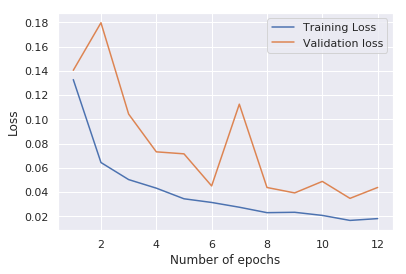

In [28]:
#Evaluating the model...
score3 = cnn_model3.evaluate(X_test, Y_test, verbose=0)
print("Test loss:", score2[0])
print("Test accuracy:", score2[1])

ty = history.history['loss']
vy = history.history['val_loss']

%matplotlib inline
loss_plotter(ty, vy, n_epoch)

***Inference:*** In Model 3, we observe that the training loss converges to a minimum faster than Model 1 and 2, although validation loss exceeds train loss at all time steps in training. This suggests Model 3 highly overfits to training data and is not the best for classifying unseen data.

## Conclusions

The below table compares and contrasts the above discussed three models.

In [30]:
from prettytable import PrettyTable
    
comp_table = PrettyTable()

comp_table.field_names = ["Model No.", "Type", "Number of Conv Layers", "Test Score", "Test Accuracy"]

comp_table.add_row(["Model_1", "CNN", 2, round(score1[0], 4), score1[1]])
comp_table.add_row(["Model_2", "CNN", 5, round(score2[0], 4), score2[1]])
comp_table.add_row(["Model_3", "Residual CNN", 10, round(score3[0], 4), score3[1]])

print(comp_table)

+-----------+--------------+-----------------------+------------+---------------+
| Model No. |     Type     | Number of Conv Layers | Test Score | Test Accuracy |
+-----------+--------------+-----------------------+------------+---------------+
|  Model_1  |     CNN      |           2           |   0.0251   |     0.9927    |
|  Model_2  |     CNN      |           5           |   0.0219   |     0.9934    |
|  Model_3  | Residual CNN |           10          |   0.0438   |     0.9904    |
+-----------+--------------+-----------------------+------------+---------------+


### ***Finally, we can conclude from the above table that Model 2 with 5 convolutional layers and batch normalization exhibits best results for classifying unseen hand-written digits among the three models we have experimented with. Model 1 also shows comparably good performance. However, Model 3 performs most poorly. From this we may infer that a more complicated architecture with several layers does not always guarantee better performance, especially for simpler tasks like MNIST classification.***